In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
tracks_df = pd.read_csv("tracks_2000.csv", index_col=[0])

In [4]:
tracks_df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [5]:
tracks_df['artist'].nunique()

994

In [6]:
x = tracks_df.loc[: ,"artist":]
y = tracks_df["popularity"]

In [7]:
x.shape

(2338, 13)

In [8]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

In [9]:
cat_col = ['artist', 'top genre','year']
num_col = tracks_df.iloc[: , 4:].columns.to_list()

In [10]:
col_transform = ColumnTransformer([("ohe",OneHotEncoder(handle_unknown= 'ignore', sparse=False), cat_col),("normalization", MinMaxScaler(),num_col)], remainder='passthrough')

In [11]:
x_train_transformed=col_transform.fit_transform(xtrain)

In [12]:
x_test_transformed = col_transform.transform(xtest)

In [13]:
x_train_transformed.shape

(1987, 1187)

In [14]:
x_test_transformed.shape

(351, 1187)

In [19]:
model =Sequential([
    Dense(64, activation="relu", input_shape=(x_train_transformed.shape[1],)),
    Flatten(),
    BatchNormalization(),
    Dense(64, activation="relu"),
    Dense(1)
    ])


In [20]:
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                76032     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 80,513
Trainable params: 80,385
Non-trainable params: 128
__________________________________________________

In [21]:
model.fit(x_train_transformed, ytrain, batch_size=32,epochs=20, verbose=0)

In [22]:
y_pred= model.predict(x_test_transformed)

11/11 [==============================] - 0s 4ms/step


In [23]:
print(model.evaluate(x_train_transformed, ytrain))

63/63 [==============================] - 1s 3ms/step - loss: 8.4163
8.416339874267578


In [24]:
mse = model.evaluate(x_train_transformed, ytrain)
print(mse)

63/63 [==============================] - 0s 4ms/step - loss: 8.4163
8.416339874267578


In [25]:
print("rsme:%.3f" % mse**0.5)

rsme:2.901


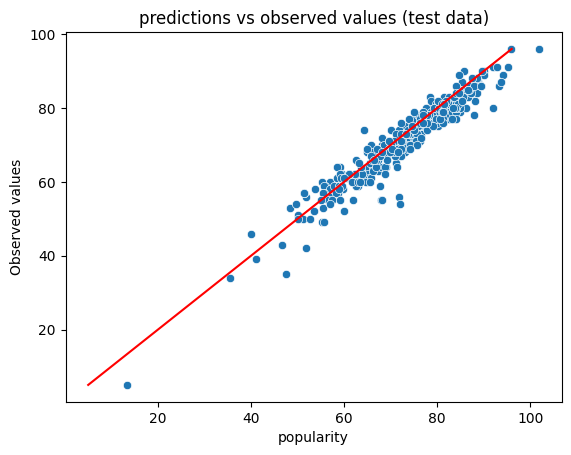

In [27]:
ax=sns.scatterplot(x=y_pred.flatten(), y=ytest)
ax=sns.lineplot(x=ytest, y=ytest, color='red')
ax.set_title("predictions vs observed values (test data)")
ax.set_ylabel('Observed values');